In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('/content/gdrive/MyDrive/FPT/FPT.csv')
df1


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


Phân tích biến động giá cổ phiếu dựa trên giá close cuối ngày


In [ ]:
df1 = df1[['Date/Time', 'Close']]

df1

,Date/Time,Close
0,12/25/2018 9:15,30.89
1,12/25/2018 9:16,30.81
2,12/25/2018 9:17,30.74
3,12/25/2018 9:18,30.74
4,12/25/2018 9:19,30.74
...,...,...
97401,12/22/2020 14:24,58.20
97402,12/22/2020 14:25,58.20
97403,12/22/2020 14:26,58.20
97404,12/22/2020 14:29,58.10


In [ ]:
df1['Date/Time']

0         12/25/2018 9:15
1         12/25/2018 9:16
2         12/25/2018 9:17
3         12/25/2018 9:18
4         12/25/2018 9:19
               ...       
97401    12/22/2020 14:24
97402    12/22/2020 14:25
97403    12/22/2020 14:26
97404    12/22/2020 14:29
97405    12/22/2020 14:46
Name: Date/Time, Length: 97406, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:


def str_to_datetime1(s):
  sp = s.split(' ')[0]
  sp1 = s.split(' ')[1]

  split = sp.split('/')
  split1 = sp1.split(':')
 
  year, month, day,hour,minute = int(split[2]), int(split[0]), int(split[1]), int(split1[0]), int(split1[1])
  return datetime.datetime(year=year, month=month, day=day,hour=hour,minute=minute)

datetime_object1 = str_to_datetime1('12/25/2018 9:15')
datetime_object1

datetime.datetime(2018, 12, 25, 9, 15)

In [ ]:
df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime1)
df1['Date/Time']

<ipython-input-20-1c30a0f8f3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime1)


0       2018-12-25 09:15:00
1       2018-12-25 09:16:00
2       2018-12-25 09:17:00
3       2018-12-25 09:18:00
4       2018-12-25 09:19:00
                ...        
97401   2020-12-22 14:24:00
97402   2020-12-22 14:25:00
97403   2020-12-22 14:26:00
97404   2020-12-22 14:29:00
97405   2020-12-22 14:46:00
Name: Date/Time, Length: 97406, dtype: datetime64[ns]

In [ ]:
df1.index = df1.pop('Date/Time')
df1

,Close
Date/Time,
2018-12-25 09:15:00,30.89
2018-12-25 09:16:00,30.81
2018-12-25 09:17:00,30.74
2018-12-25 09:18:00,30.74
2018-12-25 09:19:00,30.74
...,...
2020-12-22 14:24:00,58.20
2020-12-22 14:25:00,58.20
2020-12-22 14:26:00,58.20


In [ ]:
import numpy as np
import time
from dateutil.relativedelta import relativedelta
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime1(first_date_str)
  last_date  = str_to_datetime1(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]
    # print(x,y)
    dates.append(target_date)
    X.append(x)
    Y.append(y)
    
    next = dataframe.loc[target_date:target_date+datetime.timedelta(hours=1,days=1)+relativedelta(years=1)]
    # print("next_week",next_week)
    next_datetime_str = str(next.head(2).tail(1).index.values[0])
    # print("next_datetime_str",next_week.head(2),"|",next_week.head(2).tail(1),"|",next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    next_hour_str = next_datetime_str.split('T')[1]
    # print("next_hour_str",next_hour_str)
    # print("next_date_str",next_date_str)
    hour_minute= next_hour_str.split(':')
    year_month_day = next_date_str.split('-')
    hour,minute,sc= hour_minute
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year),hour=int(hour),minute=int(minute))
    # print(next_date)
    if last_time:
      break
    # time.sleep(0.1)
    target_date = next_date
    
    if target_date == last_date:
      last_time = True
    # time.sleep(0.001)
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df1, 
                                '12/26/2018 9:18', 
                                '12/22/2020 14:46', 
                                n=10)
windowed_df

,Target Date,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2018-12-26 09:18:00,30.89,30.81,30.74,30.74,30.74,30.74,30.66,31.11,31.19,31.19,31.15
1,2018-12-26 09:19:00,30.81,30.74,30.74,30.74,30.74,30.66,31.11,31.19,31.19,31.15,31.11
2,2018-12-26 09:20:00,30.74,30.74,30.74,30.74,30.66,31.11,31.19,31.19,31.15,31.11,31.11
3,2018-12-26 09:22:00,30.74,30.74,30.74,30.66,31.11,31.19,31.19,31.15,31.11,31.11,31.11
4,2018-12-26 09:23:00,30.74,30.74,30.66,31.11,31.19,31.19,31.15,31.11,31.11,31.11,31.19
...,...,...,...,...,...,...,...,...,...,...,...,...
97391,2020-12-22 14:24:00,58.20,58.10,58.10,58.10,58.10,58.10,58.10,58.10,58.10,58.20,58.20
97392,2020-12-22 14:25:00,58.10,58.10,58.10,58.10,58.10,58.10,58.10,58.10,58.20,58.20,58.20
97393,2020-12-22 14:26:00,58.10,58.10,58.10,58.10,58.10,58.10,58.10,58.20,58.20,58.20,58.20
97394,2020-12-22 14:29:00,58.10,58.10,58.10,58.10,58.10,58.10,58.20,58.20,58.20,58.20,58.10


Chia data thành 3 phần test, train, validate

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  
  dates = df_as_np[:,0]
 
  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  
  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((97396,), (97396, 10, 1), (97396,))

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)
q_80, q_90, int(len(dates))

(77916, 87656, 97396)

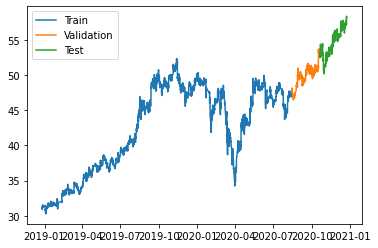

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

PHÂN TÍCH MÔ HÌNH



> Input Layer


Input Layer: Đầu vào có kích thước (10, 1), có nghĩa là nó mong đợi các chuỗi đầu vào có độ dài 10 với một đặc trưng duy nhất. Lớp đầu vào được định nghĩa bằng cách sử dụng hàm Input từ module layers.

> LSTM Layer


LSTM Layer: Mô hình có một lớp LSTM với 64 ô nhớ. Lớp LSTM được thiết kế để bắt các long-term dependencies  trong chuỗi đầu vào, điều này có thể quan trọng đối với các tác vụ dự đoán time series.

> Dense Layers


Dense Layers: Mô hình có ba lớp dense, mỗi lớp có 32 đơn vị và một hàm kích hoạt ReLU( ban đầu dùng elu thì không cho được kết quả tốt hơn). Các lớp này có nhiệm vụ để chuyển đổi đầu ra của lớp LSTM thành định dạng phù hợp.

> Output Layer


Output Layer: Lớp đầu ra bao gồm một đơn vị dense với một hàm kích hoạt tuyến tính, điều này có nghĩa là nó sản xuất một giá trị đầu ra liên tục.

In [ ]:
#BUILD LSTM
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import os
import tensorflow as tf
from tensorflow import keras
def create_model():
  model = Sequential([layers.Input((10, 1)),
                      layers.LSTM(64),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse', 
                optimizer=Adam(learning_rate=0.0001),
                metrics=['mean_absolute_error'])
  return model

model= create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = "/content/gdrive/MyDrive/FPT/tensorflow/FPT.h5"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,monitor='val_loss',
                                                  mode='min',
                                                  save_best_only=True)
model.load_weights(checkpoint_path)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10,callbacks=[cp_callback])
loss, acc = model.evaluate(X_val, y_val, verbose=1)
print("model, accuracy: {:5.2f}%".format(100 * acc))

Epoch 1/10
 342/2435 [===>..........................] - ETA: 23s - loss: 0.0048 - mean_absolute_error: 0.0458

KeyboardInterrupt: ignored

DỰ ĐOÁN BIẾN ĐỘNG TRÊN LƯỢNG DATA DÃ TRAIN

2435/2435 [==============================] - 7s 3ms/step
[31.159971 31.153936 31.144037 ... 48.01178  48.020664 48.082096]


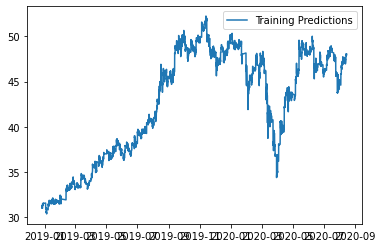

In [ ]:
train_predictions = model.predict(X_train).flatten()
print(train_predictions)
plt.plot(dates_train, train_predictions)
plt.legend(['Training Predictions'])


[31.15 31.11 31.11 ... 48.   48.1  48.1 ]


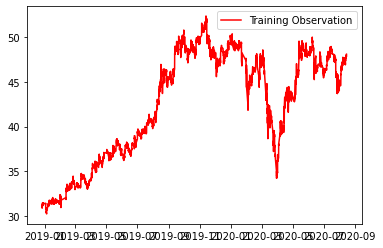

In [ ]:
plt.plot(dates_train, y_train,'r')
print(y_train)
plt.legend(['Training Observation'])

DỰ ĐOÁN TRÊN LƯỢNG DATA VALIDATION

305/305 [==============================] - 1s 2ms/step


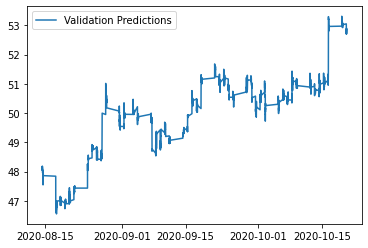

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)

plt.legend(['Validation Predictions'])

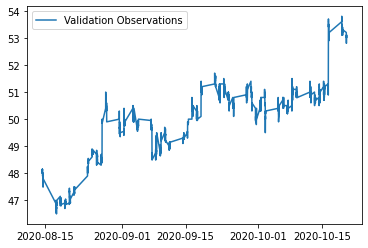

In [ ]:
plt.plot(dates_val, y_val)
plt.legend([ 'Validation Observations'])

305/305 [==============================] - 1s 2ms/step


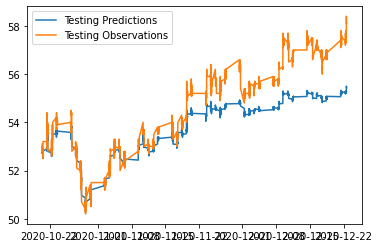

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])